# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Melly
- **Email:** guslainimelly@gmail.com
- **ID Dicoding:** melly123

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : How is the distribution of bike rentals based on hourly time?
- Pertanyaan 2 : What are the main factors that influence the number of bike rentals in a day?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data Hour : This dataset contains bike rental data on an hourly basis. It has 17 columns.
- Data Day : This dataset contains bike rental data on a daily basis. It has 17 columns, and the columns are the same as those in the Hour Data.

### Assessing Data

In [20]:
hour_df.info()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [21]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Data Hour : Based on the data assessment conducted, the Hour Data does not have any missing values and does not contain duplicate data. However, there is a data type error in the dteday column.
- Data Day : Based on the data assessment conducted, the Day Data does not have any missing values and does not contain duplicate data. However, there is a data type error in the dteday column.

### Cleaning Data

In [18]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [19]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Data Hour : The data type of 'dteday' in the Hour Data has been corrected from 'object' to 'datetime'.
- Data Day : The data type of 'dteday' in the Day Data has been corrected from 'object' to 'datetime'.

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

In [18]:
bins = [0, 22, 100, 500, 1000, 5000, 8714]
labels = ['0-22', '23-100', '101-500', '501-1000', '1001-5000', '5001-8714']
day_df['cnt_range'] = pd.cut(day_df['cnt'], bins=bins, labels=labels, right=True)
result = day_df.groupby(by='cnt_range').agg({
    "atemp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

print(result)

              atemp                                     hum            \
                max       min      mean       std       max       min   
cnt_range                                                               
0-22       0.439400  0.439400  0.439400       NaN  0.880000  0.880000   
23-100          NaN       NaN       NaN       NaN       NaN       NaN   
101-500    0.220333  0.219700  0.220017  0.000448  0.823333  0.687500   
501-1000   0.425492  0.079070  0.258177  0.113977  0.970417  0.000000   
1001-5000  0.840896  0.101658  0.430525  0.165327  0.972500  0.187917   
5001-8714  0.786613  0.242400  0.553632  0.119658  0.925000  0.254167   

                              windspeed                                   cnt  \
               mean       std       max       min      mean       std     max   
cnt_range                                                                       
0-22       0.880000       NaN  0.358200  0.358200  0.358200       NaN    22.0   
23-100          Na

<ipython-input-18-0d317856ac73>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = day_df.groupby(by='cnt_range').agg({


**Insight:**
- The data shows the central tendency and distribution of the number of bike rentals for each hour.
- The minimum, mean, and standard deviation of several factors that influence the number of bike rentals can be observed. These factors include temperature, apparent temperature, humidity, and wind speed.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : How is the distribution of bike rentals based on hourly time?

In [7]:
hourly_rentals = hour_df.groupby('hr')['cnt'].sum()
for hour, count in hourly_rentals.items():
    print(f"{hour} : {count}")

0 : 39130
1 : 24164
2 : 16352
3 : 8174
4 : 4428
5 : 14261
6 : 55132
7 : 154171
8 : 261001
9 : 159438
10 : 126257
11 : 151320
12 : 184414
13 : 184919
14 : 175652
15 : 183149
16 : 227748
17 : 336860
18 : 309772
19 : 226789
20 : 164550
21 : 125445
22 : 95612
23 : 63941


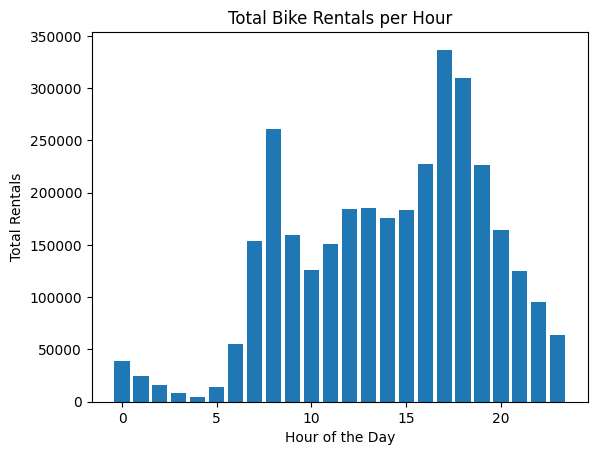

In [8]:
plt.bar(hourly_rentals.index, hourly_rentals.values)
plt.title('Total Bike Rentals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.show()

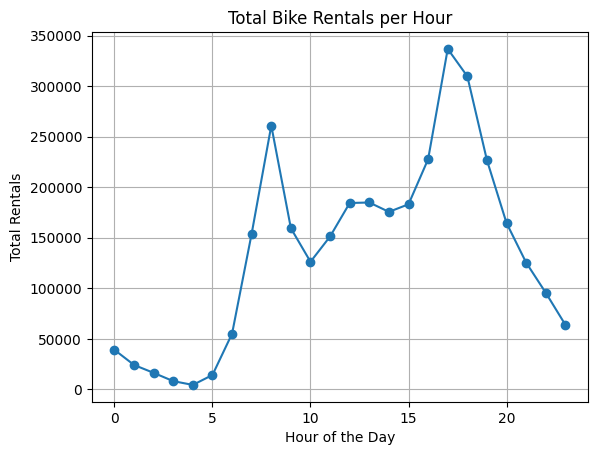

In [9]:
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o')
plt.title('Total Bike Rentals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

**Insight:**
- Rentals occur most frequently outside of sleeping hours, specifically from 7 AM to 8 PM.
- The highest number of rentals occurs at 5 PM.

### Pertanyaan 2 : What are the main factors that influence the number of bike rentals in a day?

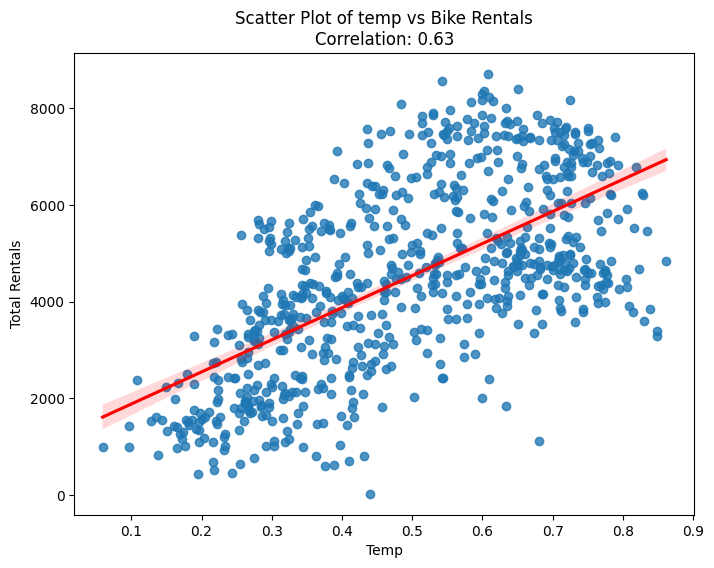

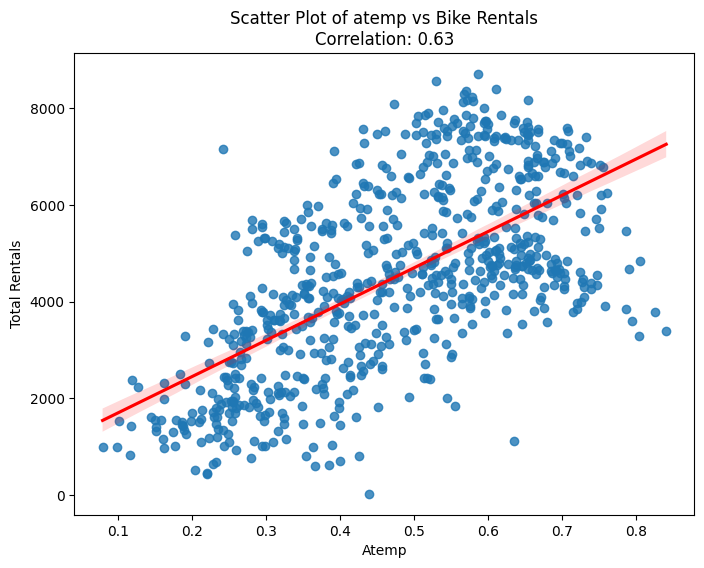

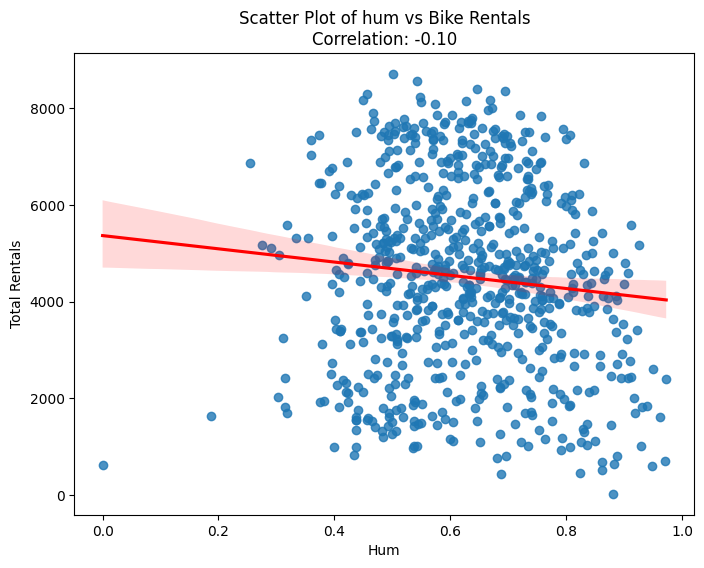

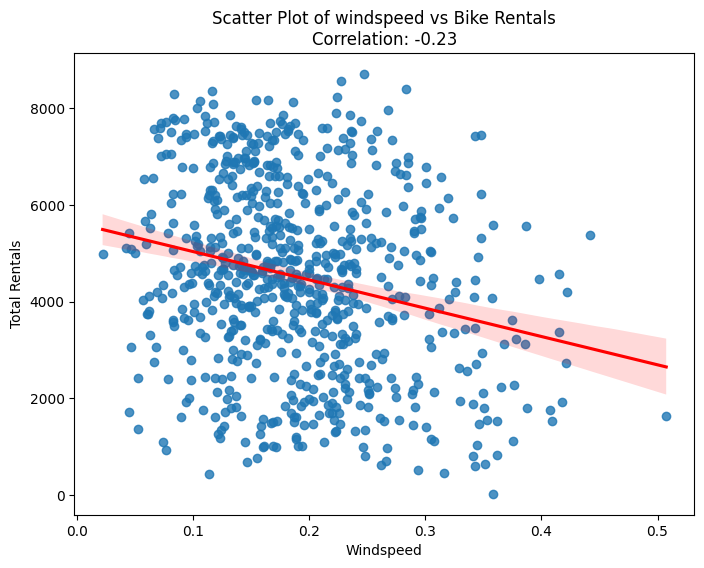

In [11]:
factors = ['temp', 'atemp', 'hum', 'windspeed']
for factor in factors:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=day_df, x=factor, y='cnt', line_kws={"color": "red"})
    correlation = np.corrcoef(day_df[factor], day_df['cnt'])[0, 1]
    plt.title(f'Scatter Plot of {factor} vs Bike Rentals\nCorrelation: {correlation:.2f}')
    plt.xlabel(factor.capitalize())
    plt.ylabel('Total Rentals')
    plt.show()

**Insight:**
- The relationship between the number of bikes rented and the actual temperature is positive, as indicated by the provided line and the correlation value of 0.63.
- The relationship between the number of bikes rented and the felt temperature is positive, as indicated by the provided line and the correlation value of 0.63.
- The relationship between the number of bikes rented and humidity is negative, as indicated by the provided line and the correlation value of -0.10.
- The relationship between the number of bikes rented and wind speed is negative, as indicated by the provided line and the correlation value of -0.23.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Based on the obtained visualization, bikes are rented more frequently in the morning and evening. This makes sense, as these times coincide with the commuting hours for going to and returning from work. Therefore, the bike-sharing company should provide a sufficient number of bikes during these times.
- Conclution pertanyaan 2 : Based on the scatterplot indicates that as the temperature increases (with a maximum temperature of 41 degrees Celsius), the number of bike rentals also increases. Furthermore, the scatterplot visualization and the obtained correlation values, it can be concluded that the factors influencing the number of bike rentals each day are temperature, both the actual temperature and the felt temperature.